**Модель с объединенным классом здания**

In [ ]:
import os
import shutil
from google.colab import drive

# Монтирование Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import shutil
import os

# Это уже аугментированный датасет. Путь к зазипованному датасету и директория, куда его нужно распаковать
zip_path = '/content/drive/MyDrive/Model1/Dataset 1.2.zip'
extract_path = '/content/dataset_1.2'

# Распаковка ZIP-файла
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Путь для копирования в /content/
local_zip_path = '/content/dataset_1.2.zip'

# Копирование файла
shutil.copy(zip_path, local_zip_path)

# Проверка успешного копирования
if os.path.exists(local_zip_path):
    print(f"Файл {local_zip_path} успешно скопирован.")
else:
    print(f"Ошибка при копировании файла.")



Файл /content/dataset_1.2.zip успешно скопирован.


In [ ]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Путь к папке
dataset_path = '/content/dataset_1.2'

# Подсчет всех файлов во всех вложенных папках
total_files = count_files_in_directory(dataset_path)

# Вывод количества файлов
print(f"Всего файлов в папке {dataset_path} и её вложенных папках: {total_files}")


Всего файлов в папке /content/dataset_1.2 и её вложенных папках: 34221


In [1]:
import numpy as np
import os
from tqdm import tqdm

In [ ]:
# Импорт необходимых библиотек для работы с YOLO и обучения модели
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Импорт библиотек для работы с файловой системой и визуализации
import os
import matplotlib.pyplot as plt

print("Библиотеки успешно импортированы.")


Библиотеки успешно импортированы.


In [ ]:

!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 17147, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 17147 (delta 18), reused 37 (delta 7), pack-reused 17085
Receiving objects: 100% (17147/17147), 9.05 MiB | 17.09 MiB/s, done.
Resolving deltas: 100% (11957/11957), done.


In [ ]:

!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()

In [ ]:
import os

# Пути к папкам с тренировочными и валидационными метками
train_labels_source = '/content/dataset_1.2/train/labels'
valid_labels_source = '/content/dataset_1.2/valid/labels'

# Пути к папкам, куда будут скопированы измененные метки
train_labels_dest = '/content/dataset_1.2_new/train/labels'
valid_labels_dest = '/content/dataset_1.2_new/valid/labels'

# Списки для конвертации классов
n1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n2 = [0, 1, 2, 3, 4, 5, 4, 4, 6, 7]

def find_and_convert(num):
    if num in n1:
        return n2[n1.index(num)]
    else:
        return num

def convert_line(line):
    nums = line.strip().split()
    nums[0] = str(find_and_convert(int(nums[0])))
    return ' '.join(nums)

def copy_file_with_convert(file_path, destination_folder):
    with open(file_path, 'r') as file:
        filename = os.path.basename(file_path)
        new_file_path = os.path.join(destination_folder, filename)
        with open(new_file_path, 'w') as new_file:
            first_line = True
            for line in file:
                if first_line:
                    new_line = convert_line(line)
                    first_line = False
                else:
                    new_line = "\n" + convert_line(line)
                new_file.write(new_line)

def copy_text_files(source_folder, destination_folder):
    if not os.path.exists(source_folder):
        print(f"Source folder {source_folder} does not exist.")
        return

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)
        if os.path.isfile(file_path) and filename.endswith('.txt'):
            copy_file_with_convert(file_path, destination_folder)

    print(f"All text files from {source_folder} have been successfully copied to {destination_folder}.")

# Применение функции для тренировочного и валидационного наборов данных
copy_text_files(train_labels_source, train_labels_dest)
copy_text_files(valid_labels_source, valid_labels_dest)


All text files from /content/dataset_1.2/train/labels have been successfully copied to /content/dataset_1.2_new/train/labels.
All text files from /content/dataset_1.2/valid/labels have been successfully copied to /content/dataset_1.2_new/valid/labels.


In [ ]:
import shutil

# Пути к исходным папкам с изображениями
train_images_source = '/content/dataset_1.2/train/images'
valid_images_source = '/content/dataset_1.2/valid/images'

# Пути к папкам, куда будут скопированы изображения
train_images_dest = '/content/dataset_1.2_new/train/images'
valid_images_dest = '/content/dataset_1.2_new/valid/images'

def copy_images(source_folder, destination_folder):
    if not os.path.exists(source_folder):
        print(f"Source folder {source_folder} does not exist.")
        return

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, destination_folder)

    print(f"All images from {source_folder} have been successfully copied to {destination_folder}.")

# Копирование изображений для тренировочного и валидационного наборов данных
copy_images(train_images_source, train_images_dest)
copy_images(valid_images_source, valid_images_dest)


All images from /content/dataset_1.2/train/images have been successfully copied to /content/dataset_1.2_new/train/images.
All images from /content/dataset_1.2/valid/images have been successfully copied to /content/dataset_1.2_new/valid/images.


In [ ]:
pip install PyYAML


In [ ]:
import yaml

# Ямл меняем под новый датасет
yaml_path = '/content/data6.yaml'

# Чтение YAML-файла
with open(yaml_path, 'r') as file:
    yaml_data = yaml.safe_load(file)

# Изменение списка имен классов
yaml_data['names'] = ['Agricultural object', 'Fields', 'Forest', 'Grassland', 'Buildings', 'Power lines', 'Road', 'Water']
yaml_data['nc'] = 8  # Обновление количества классов


yaml_data['train'] = '/content/dataset_1.2_new/train/images'
yaml_data['train_labels'] = '/content/dataset_1.2_new/train/labels'
yaml_data['val'] = '/content/dataset_1.2_new/valid/images'
yaml_data['val_labels'] = '/content/dataset_1.2_new/valid/labels'

# Удаление ключей для тестовых данных, если их нет
if 'test' in yaml_data:
    del yaml_data['test']
if 'test_labels' in yaml_data:
    del yaml_data['test_labels']

# Сохранение изменений в том же YAML-файле
with open(yaml_path, 'w') as file:
    yaml.safe_dump(yaml_data, file)
print(yaml_data)



{'names': ['Agricultural object', 'Fields', 'Forest', 'Grassland', 'Buildings', 'Power lines', 'Road', 'Water'], 'nc': 8, 'train': '/content/dataset_1.2_new/train/images', 'train_labels': '/content/dataset_1.2_new/train/labels', 'val': '/content/dataset_1.2_new/valid/images', 'val_labels': '/content/dataset_1.2_new/valid/labels'}


In [ ]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Путь к папке
dataset_path = '/content/dataset_1.2_new'

# Подсчет всех файлов во всех вложенных папках
total_files = count_files_in_directory(dataset_path)

# Вывод количества файлов
print(f"Всего файлов в папке {dataset_path} и её вложенных папках: {total_files}")


Всего файлов в папке /content/dataset_1.2_new и её вложенных папках: 34220


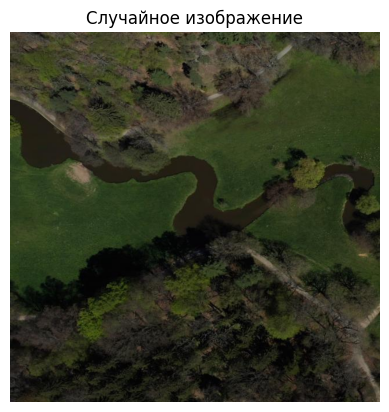

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt


# Укажите путь к папке с изображениями
image_folder = '/content/dataset_1.2_new/train/images'

# Получите список всех файлов в папке
image_files = os.listdir(image_folder)

# Выберите случайное изображение из списка
random_image = random.choice(image_files)

try:
    # Получите полный путь к выбранному изображению
    image_path = os.path.join(image_folder, random_image) if random_image else None

    if image_path:
        # Загрузите и отобразите выбранное изображение
        image = cv2.imread(image_path)

        # Проверьте, удалось ли загрузить изображение
        if image is not None:
            # Отобразите изображение с помощью matplotlib
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Случайное изображение')
            plt.axis('off')
            plt.show()
        else:
            print(f'Не удалось загрузить изображение по пути: {image_path}')
    else:
        print('Нет доступных изображений.')
except Exception as e:
    print(f'Произошла ошибка при загрузке изображения: {str(e)}')


In [ ]:
import fiftyone as fo

# Создание нового датасета
dataset = fo.Dataset(name="my_dataset")

# Загрузка изображений из директории
dataset.add_images("/path/to/image/directory")

# Загрузка данных
sample = fo.Sample(filepath="/path/to/image.jpg")
sample["label"] = fo.Classification(label="cat")
dataset.add_sample(sample)

sample.tags.append("train")
sample["custom_field"] = 51

dataset.add_sample(sample)

view = dataset.match_tags("train").sort_by("custom_field").limit(10)

for sample in view:
    print(sample)

In [ ]:
import fiftyone.brain as fob

fob.compute_uniqueness(dataset)
rank_view = dataset.sort_by("uniqueness")

In [ ]:
# Запуск сессии для визуализации
session = fo.launch_app(dataset)

In [ ]:
from ultralytics import YOLO

model6 = YOLO('/content/yolov8s-seg.pt')
# Display model information (optional)
model6.info()


100%|██████████| 22.8M/22.8M [00:00<00:00, 410MB/s]

YOLOv8s-seg summary: 261 layers, 11821056 parameters, 0 gradients, 42.9 GFLOPs


In [ ]:

#тренируем модель
results = model6.train(data='/content/data6.yaml', epochs=40, imgsz=640, save=True, project='/content/runs', verbose=True)




Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/data6.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=/content/runs, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

In [ ]:
def process(self, tp_b, tp_m, conf, pred_cls, target_cls):


    results_mask = ap_per_class(tp_m,
                                conf,
                                pred_cls,
                                target_cls,
                                plot=self.plot,
                                on_plot=self.on_plot,
                                save_dir=self.save_dir,
                                names=self.names,
                                prefix='Mask')[2:]
    self.seg.nc = len(self.names)
    self.seg.update(results_mask)
    results_box = ap_per_class(tp_b,
                               conf,
                               pred_cls,
                               target_cls,
                               plot=self.plot,
                               on_plot=self.on_plot,
                               save_dir=self.save_dir,
                               names=self.names,
                               prefix='Box')[2:]
    self.box.nc = len(self.names)
    self.box.update(results_box)

In [ ]:
def __init__(self, save_dir=('/content/1'), plot=True, on_plot=True, names=()) -> None:
    """Initialize a SegmentMetrics instance with a save directory, plot flag, callback function, and class names."""
    self.save_dir = save_dir
    self.plot = plot
    self.on_plot = on_plot
    self.names = names
    self.box = Metric()
    self.seg = Metric()
    self.speed = {'preprocess': 0.0, 'inference': 0.0, 'loss': 0.0, 'postprocess': 0.0}
    self.task = 'segment'


In [ ]:
model6.predict(source="/content/plant_test.jpg", save=True)  # предсказать по изображению


Results saved to /content/runs/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
  + tensor([[3.00000e+00, 0.00000e+00, 7.96000e+02, 5.21000e+02, 7.07546e-01, 4.00000e+00],
         [3.79000e+02, 1.72000e+02, 5.84000e+02, 3.77000e+02, 5.78789e-01, 4.00000e+00],
         [1.10000e+01, 1.00000e+00, 3.93000e+02, 1.01000e+02, 4.13276e-01, 4.00000e+00],
         [7.90000e+01, 2.80000e+01, 1.16000e+02, 6.70000e+01, 2.75843e-01, 4.00000e+00]], device='cuda:0')Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Masks'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 448, 640])
 dtype: torch.float32
  + tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
 

In [ ]:
model6.predict(source="/content/hotel.jpg", save=True)  # предсказать по изображению


Results saved to /content/runs/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([26, 6])
 dtype: torch.float32
  + tensor([[0.00000e+00, 2.40000e+01, 1.23000e+02, 2.03000e+02, 8.76666e-01, 4.00000e+00],
         [2.08000e+02, 2.00000e+00, 8.88000e+02, 2.31000e+02, 8.61572e-01, 2.00000e+00],
         [1.00000e+00, 7.00000e+00, 3.68000e+02, 5.40000e+02, 7.94789e-01, 2.00000e+00],
         [1.42000e+02, 5.71000e+02, 3.06000e+02, 6.65000e+02, 7.18844e-01, 4.00000e+00],
         [3.21000e+02, 5.49000e+02, 6.84000e+02, 6.66000e+02, 6.07588e-01, 2.00000e+00],
         [1.88000e+02, 3.60000e+02, 2.29000e+02, 3.95000e+02, 5.96082e-01, 4.00000e+00],
         [1.18000e+02, 3.29000e+02, 1.60000e+02, 3.71000e+02, 5.85572e-01, 4.00000e+00],
         [9.10000e+01, 3.18000e+02, 1.25000e+02, 3.60000e+02, 5.63481e-01, 4.00000e+00],
         [1.85000e+02, 5.19000e+02, 3.32000e+02, 6.38000e+02, 5.26520e-01, 3.00000e+00],
         [6.26000e+02, 1.19000e+02, 8.89000e

In [ ]:

# Define source as YouTube video URL
source = 'https://www.youtube.com/watch?v=PlPlB9C5CYE'

# Run inference on the source
model6.predict(source='https://www.youtube.com/watch?v=PlPlB9C5CYE', save=True)  # предсказать по изображению
results=model6


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

requirements: YOLOv8 requirements "pafy" "youtube_dl==2020.12.2" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.3 MB/s eta 0:00:00

requirements: 2 packages updated per ('pafy', 'youtube_dl==2020.12.2')
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

1/1: https://www.youtube.com/watch?v=PlPlB9C5CYE...  Success (540 frames 640x360 at 23.98 FPS)

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
Results saved to /content/runs/predict


In [ ]:
from google.colab import output

for i in range(100):
  print(i)
  # do something
  if i%10 == 0:
    output.clear()

In [ ]:
import cv2
import matplotlib.pyplot as plt


# Define source as YouTube video URL
source = '/content/36_4K_UHD_Drone_Radio_Tower_Parking_Lot_Silo_Crest_Point_Oregon_Fernando.mp4'

# Run inference on the source
model6.predict(source='/content/36_4K_UHD_Drone_Radio_Tower_Parking_Lot_Silo_Crest_Point_Oregon_Fernando.mp4', save=True)  # предсказать по изображению
results=model6


Results saved to /content/runs/predict


In [ ]:
import zipfile

# Путь для упаковки, перенесем всю папку ранс на гугл драйв
folder_path = '/content/runs/'

# имя архива
zip_file = '/content/runs6.zip'

# Создайте архив
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)
            zipf.write(file_path, arcname=arcname)

print(f"Архив {zip_file} успешно создан.")


Архив /content/runs6.zip успешно создан.


In [ ]:
import shutil

# Путь к созданному вами архиву
zip_file_path = '/content/runs6.zip'

# Путь к месту на Google Drive, куда хотите переместить архив
drive_destination_path = '/content/drive/My Drive/'

# Скопируйте архив на Google Drive
shutil.copy(zip_file_path, drive_destination_path)

print(f"Архив {zip_file_path} успешно скопирован на Google Drive в папку {drive_destination_path}.")




Архив /content/runs6.zip успешно скопирован на Google Drive в папку /content/drive/My Drive/.


In [ ]:
import fiftyone as fo

# Создание нового датасета
dataset = fo.Dataset(name="my_dataset")

# Загрузка изображений из директории
dataset.add_images("/path/to/image/directory")

# Загрузка данных
sample = fo.Sample(filepath="/path/to/image.jpg")
sample["label"] = fo.Classification(label="cat")
dataset.add_sample(sample)

sample.tags.append("train")
sample["custom_field"] = 51

dataset.add_sample(sample)

view = dataset.match_tags("train").sort_by("custom_field").limit(10)

for sample in view:
    print(sample)

In [ ]:
import fiftyone.brain as fob

fob.compute_uniqueness(dataset)
rank_view = dataset.sort_by("uniqueness")

In [ ]:
# Запуск сессии для визуализации
session = fo.launch_app(dataset)

In [ ]:
# Добавление предсказаний модели
sample["prediction"] = fo.Classification(label="dog", confidence=0.9)
sample.save()

# Использование встроенных функций для анализа
results = dataset.evaluate_classifications("predictions", gt_field="label", eval_key="eval")
